# Time Series Forecasting for Tesla Stock Prices

This notebook focuses on building a time series forecasting model to predict Tesla’s future stock prices using models such as ARIMA, SARIMA, or LSTM.

In [39]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

### Set base directory paths

In [ ]:
os.chdir(r'c:\users\ermias.tadesse\10x\Predictive-Analysis-And-Modeling\Data')

# Set base directory paths
raw_data_path = 'raw/'
processed_data_path = 'processed/'
os.makedirs(processed_data_path, exist_ok=True)


### Define tickers and initialize a dictionary to store data

In [26]:
tickers = ['TSLA', 'BND', 'SPY']
data_dict = {}

###  # Load, inspect, split, and save each dataset


Processing data for TSLA...
Columns in TSLA data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of TSLA data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03 00:00:00+00:00,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06 00:00:00+00:00,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07 00:00:00+00:00,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08 00:00:00+00:00,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


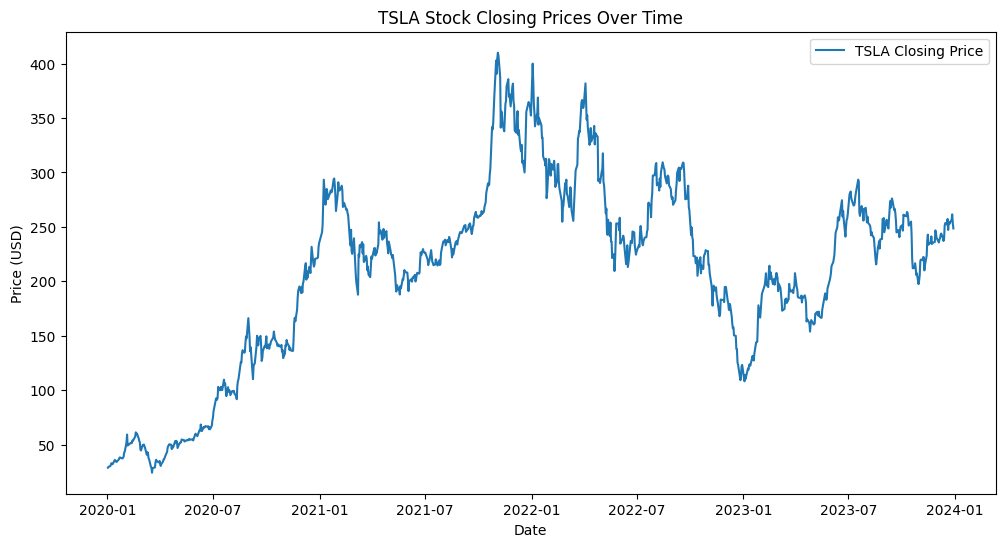

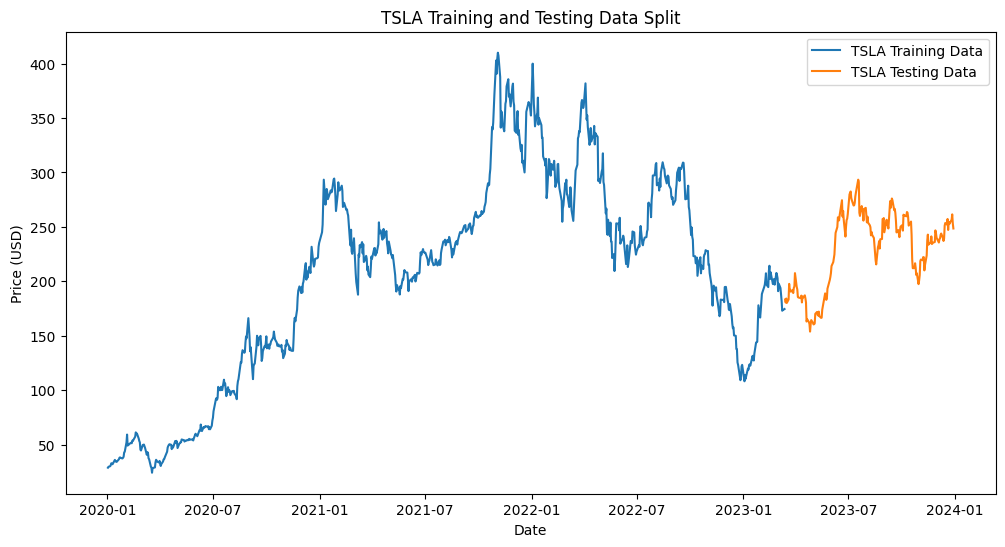


Processing data for BND...
Columns in BND data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of BND data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,73.864647,83.970001,84.110001,83.930000,83.980003,5511000
2020-01-03 00:00:00+00:00,74.128555,84.269997,84.290001,84.099998,84.180000,5368300
2020-01-06 00:00:00+00:00,74.040596,84.169998,84.309998,84.110001,84.300003,3710400
2020-01-07 00:00:00+00:00,73.979019,84.099998,84.199997,84.070000,84.199997,3029900
2020-01-08 00:00:00+00:00,73.864647,83.970001,84.199997,83.900002,84.129997,3674400


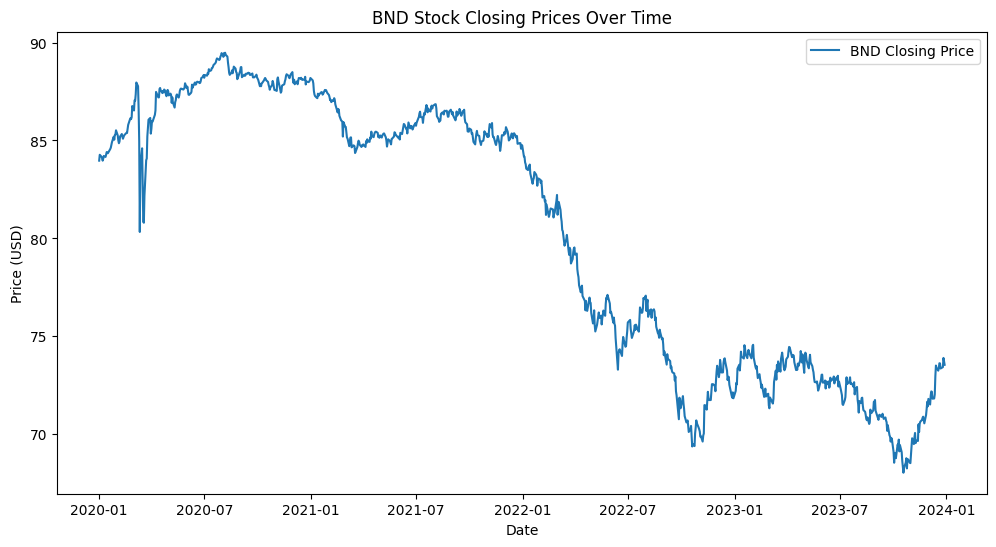

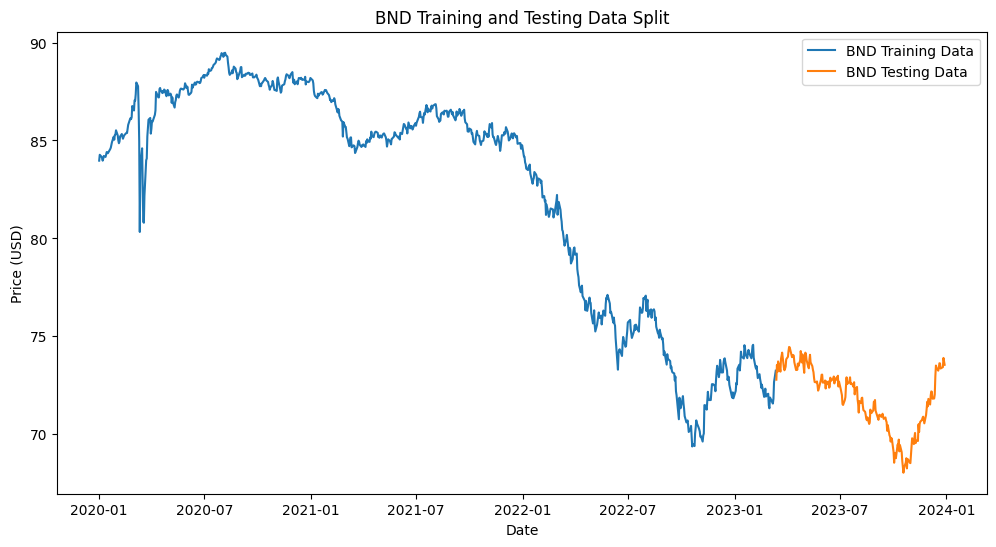


Processing data for SPY...
Columns in SPY data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of SPY data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,302.208588,324.869995,324.890015,322.529999,323.540008,59151200
2020-01-03 00:00:00+00:00,299.920136,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06 00:00:00+00:00,301.064453,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07 00:00:00+00:00,300.217895,322.730011,323.540008,322.239990,323.019989,40496400
2020-01-08 00:00:00+00:00,301.817993,324.450012,325.779999,322.670013,322.940002,68296000


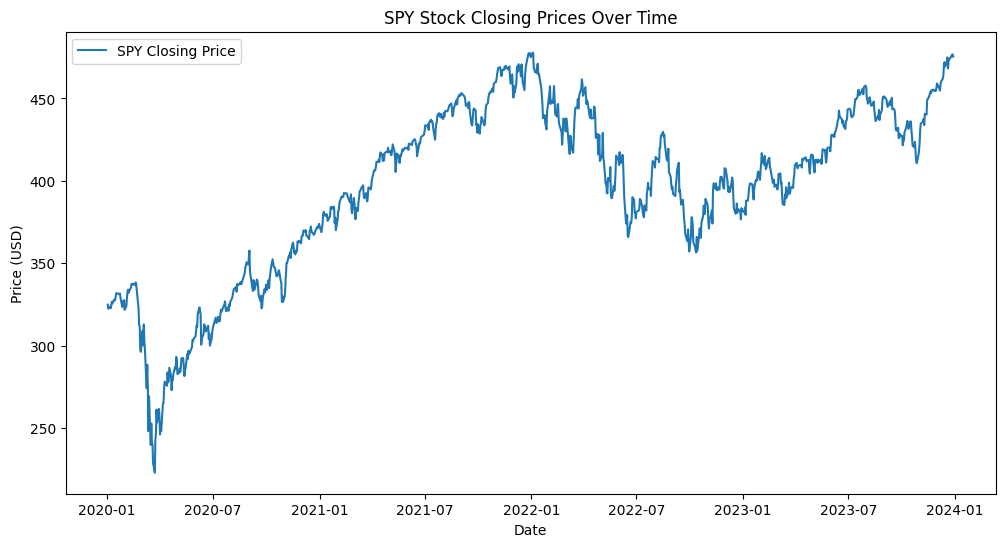

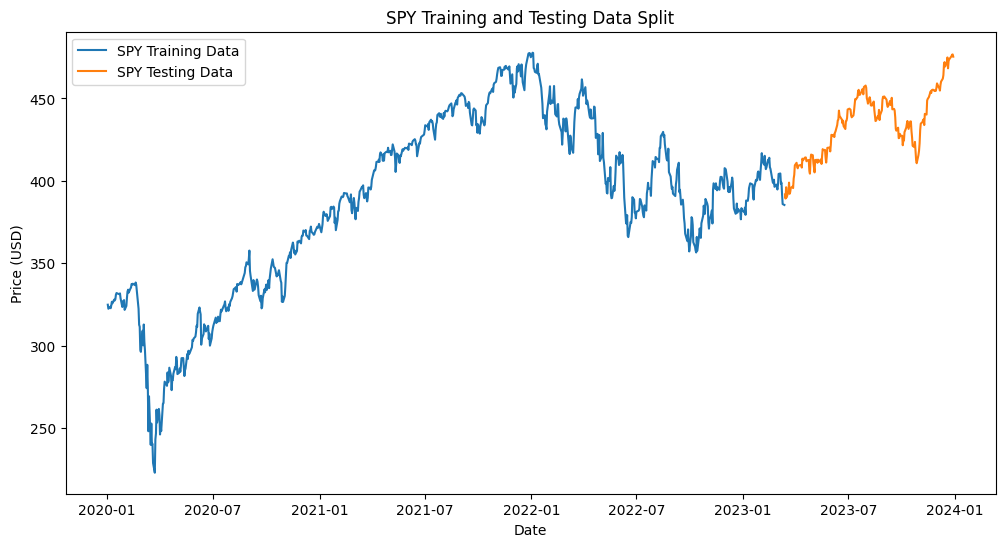

Data processing complete. Training and testing sets saved in 'data/processed/'.


In [27]:
for ticker in tickers:
    print(f"\nProcessing data for {ticker}...")

    # Load data
    file_path = os.path.join(raw_data_path, f'{ticker}.csv')
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    data_dict[ticker] = data  # Store in dictionary for further processing
    
    # Display first few rows
    print(f"Columns in {ticker} data:")
    print(data.columns)
    print(f"\nFirst few rows of {ticker} data:")
    display(data.head())
    
    # Plot the closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{ticker} Closing Price')
    plt.title(f'{ticker} Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Define training and testing split
    train_size = int(len(data) * 0.8)
    train_data = data['Close'][:train_size]
    test_data = data['Close'][train_size:]

    # Save training and testing data to processed folder
    train_data.to_csv(os.path.join(processed_data_path, f'{ticker}_train.csv'))
    test_data.to_csv(os.path.join(processed_data_path, f'{ticker}_test.csv'))

    # Plot training and testing split
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label=f'{ticker} Training Data')
    plt.plot(test_data, label=f'{ticker} Testing Data')
    plt.title(f'{ticker} Training and Testing Data Split')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

print("Data processing complete. Training and testing sets saved in 'data/processed/'.")

## ARIMA Model Setup for Stock Price Forecasting

In this section, we’ll implement an ARIMA model to forecast future stock prices for Tesla (TSLA), BND, and SPY. ARIMA (Auto-Regressive Integrated Moving Average) is effective for univariate, non-seasonal data. We will evaluate the model performance for each stock using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).


### Train ARIMA Model for Each Stock

We will train an ARIMA model for each stock. Initial (p, d, q) parameters are selected as (5, 1, 0), and we will refine these as needed.


In [35]:
# Define tickers and initial ARIMA parameters
tickers = ['TSLA', 'BND', 'SPY']
p, d, q = 5, 1, 0  # Initial ARIMA parameters (can be refined)

# Loop through each ticker
models = {}
for ticker in tickers:
    # Load training data
    train_data_path = f'processed/{ticker}_train.csv'
    train_data = pd.read_csv(train_data_path, parse_dates=['Date'], index_col='Date')

    # Train the ARIMA model
    arima_model = ARIMA(train_data['Close'], order=(p, d, q))
    arima_result = arima_model.fit()
    models[ticker] = arima_result  # Store model for later use

    # Print model summary
    print(f"\nARIMA Model Summary for {ticker}:")
    print(arima_result.summary())


ARIMA Model Summary for TSLA:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  804
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2892.471
Date:                Tue, 12 Nov 2024   AIC                           5796.942
Time:                        10:50:02   BIC                           5825.072
Sample:                             0   HQIC                          5807.746
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0386      0.031     -1.243      0.214      -0.100       0.022
ar.L2          0.0122      0.027      0.459      0.646      -0.040       0.064
ar.L3          0.0081

### Evaluate ARIMA Model on Test Data

For each stock, we’ll use the trained ARIMA model to forecast values over the test period and calculate evaluation metrics (MAE, RMSE, MAPE).


In [36]:
# Loop through each ticker for prediction and evaluation
metrics = {}
for ticker in tickers:
    # Load test data
    test_data_path = f'processed/{ticker}_test.csv'
    test_data = pd.read_csv(test_data_path, parse_dates=['Date'], index_col='Date')

    # Generate predictions for the test period using integer-based indices
    train_data_len = len(models[ticker].model.endog)
    start = train_data_len  # Start from the end of the training data
    end = start + len(test_data) - 1  # End at the end of the test data

    # Predictions and metric calculation
    predictions = models[ticker].predict(start=start, end=end, typ='levels')
    predictions.index = test_data.index  # Align prediction index with test data

    # Calculate evaluation metrics
    mae = mean_absolute_error(test_data['Close'], predictions)
    rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
    mape = np.mean(np.abs((test_data['Close'] - predictions) / test_data['Close'])) * 100
    metrics[ticker] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Print metrics
    print(f"\nEvaluation Metrics for {ticker}:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape}%")



Evaluation Metrics for TSLA:
MAE: 56.69100024053265
RMSE: 65.14572027389337
MAPE: 23.083014324096467%

Evaluation Metrics for BND:
MAE: 1.615227366269863
RMSE: 2.1259578224894007
MAPE: 2.2911450063268224%

Evaluation Metrics for SPY:
MAE: 48.73174543487503
RMSE: 52.76550015552764
MAPE: 11.035742731311702%


### Plot Predictions vs. Actual Values

This plot allows us to visually compare the ARIMA model’s predictions with the actual stock prices for each stock (TSLA, BND, SPY).


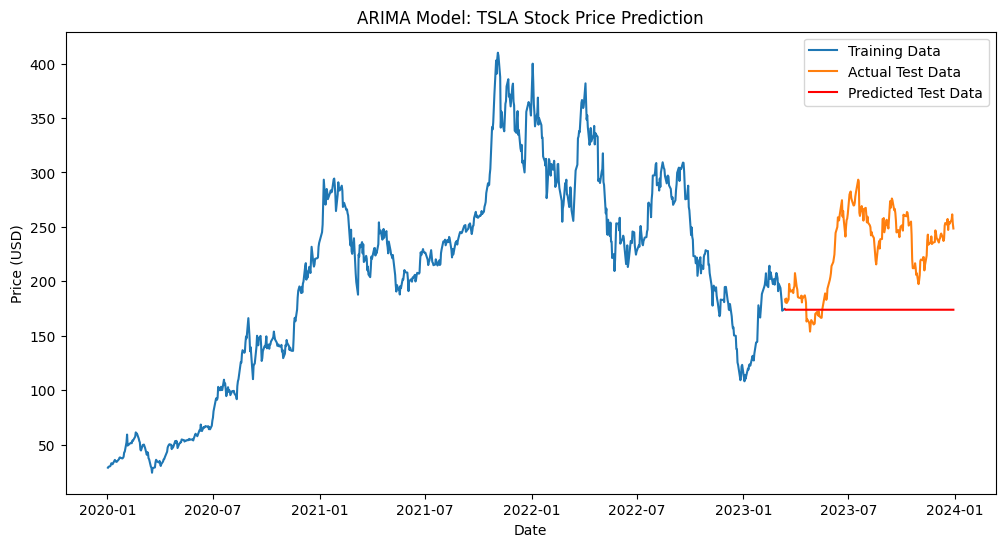

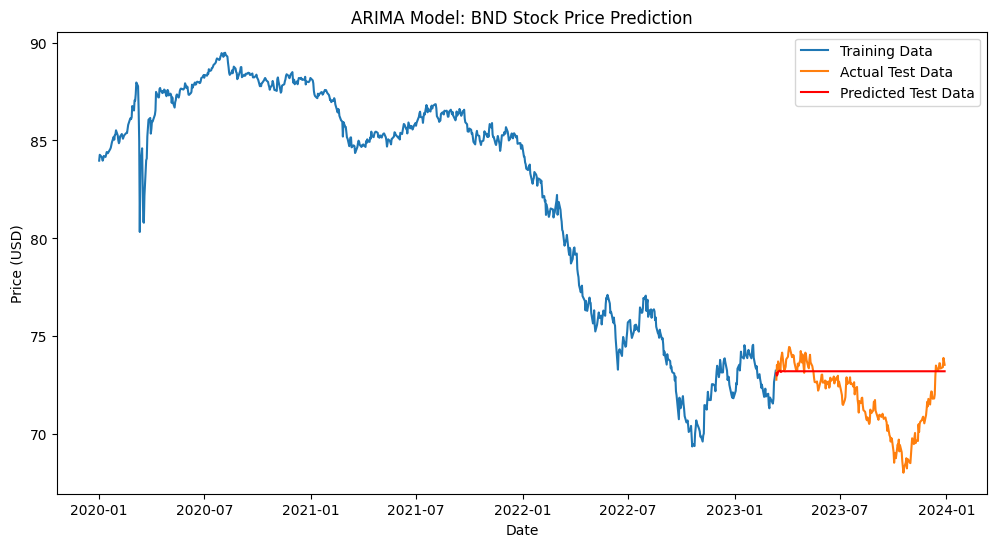

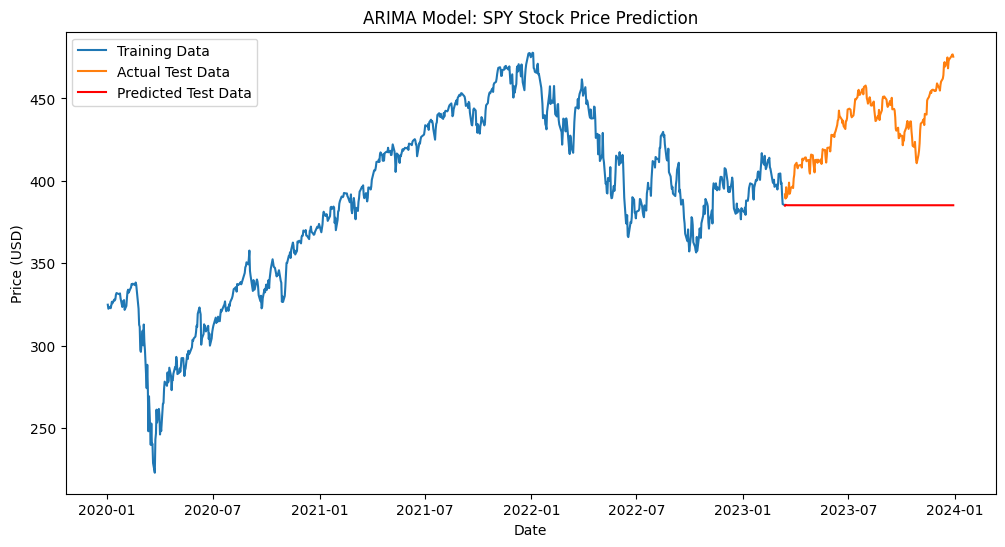

In [38]:
# Loop through each ticker to plot predictions against actual values
for ticker in tickers:
    # Load training and test data
    train_data_path = f'processed/{ticker}_train.csv'
    train_data = pd.read_csv(train_data_path, parse_dates=['Date'], index_col='Date')
    
    test_data_path = f'processed/{ticker}_test.csv'
    test_data = pd.read_csv(test_data_path, parse_dates=['Date'], index_col='Date')
    
    # Get predictions
    predictions = models[ticker].predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')
    predictions.index = test_data.index  # Align prediction index with test data

    # Plot actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['Close'], label='Training Data')
    plt.plot(test_data['Close'], label='Actual Test Data')
    plt.plot(predictions, label='Predicted Test Data', color='red')
    plt.title(f'ARIMA Model: {ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

### LSTM Time Series Forecasting for Stock Prices

This guide outlines an LSTM-based approach to forecast stock prices for multiple tickers (TSLA, BND, SPY). The script follows these steps:

1. Data Loading and Preprocessing: Load each ticker’s data, scale it, and split into training and testing sets.
2. Model Building and Training: Construct an LSTM model for each ticker, train it, and evaluate its performance.
3. Forecast Visualization and Model Saving: Generate plots to compare actual vs. predicted values and save each model for future use.


Processing data for TSLA...
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.1268 - val_loss: 0.0066
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0075 - val_loss: 0.0021
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0026 - val_loss: 0.0016
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step



Evaluation Metrics for TSLA:
MAE: 12.082709946462368
RMSE: 15.22159725561798
MAPE: 4.988728611557927%


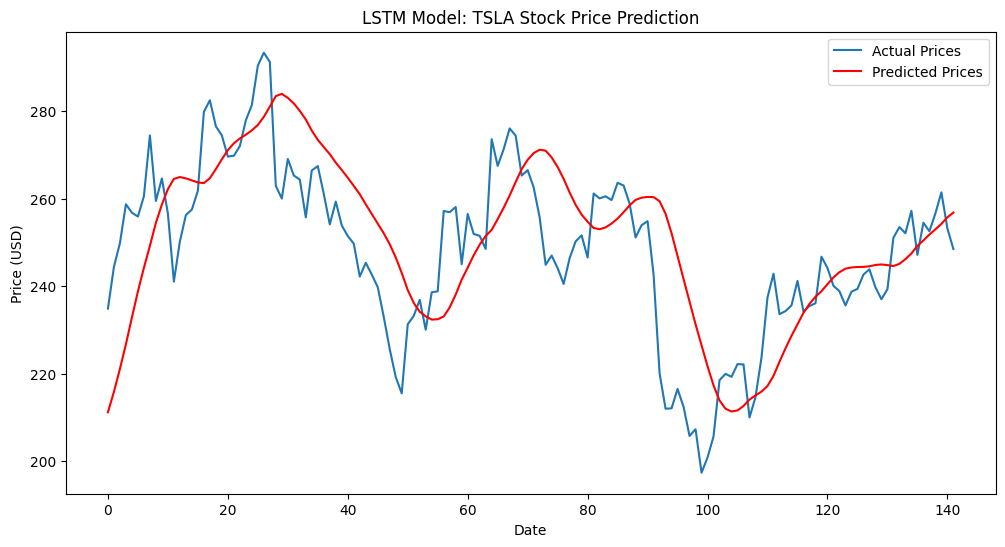


Processing data for BND...
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.1387 - val_loss: 0.0152
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0079 - val_loss: 0.0045
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0010 - val_loss: 0.0012
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step



Evaluation Metrics for BND:
MAE: 0.6090590247625991
RMSE: 0.7446643702936527
MAPE: 0.8555202590509179%


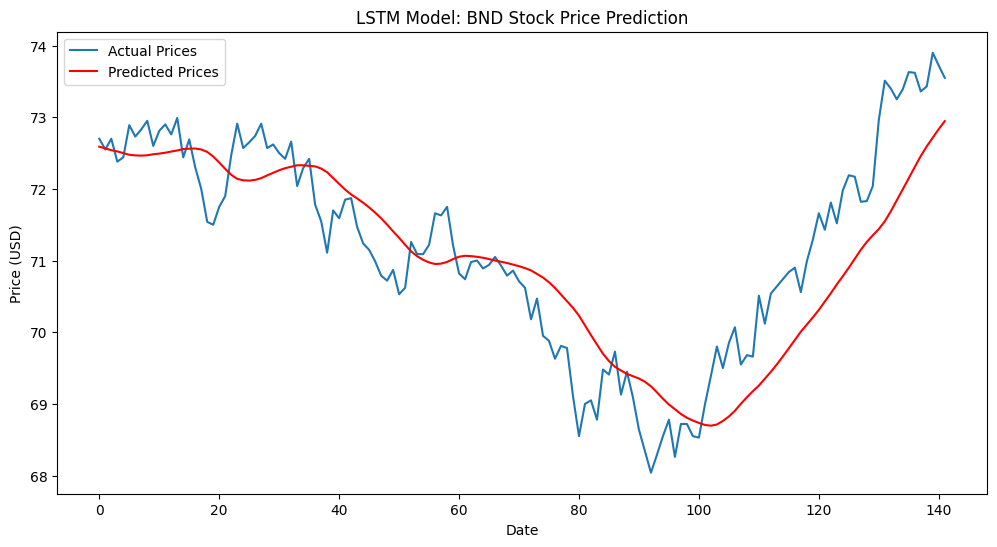


Processing data for SPY...
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.1737 - val_loss: 0.0079
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0053 - val_loss: 0.0037
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0015 - val_loss: 0.0013
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step



Evaluation Metrics for SPY:
MAE: 8.075361227219961
RMSE: 9.297931421223565
MAPE: 1.8155389255071037%


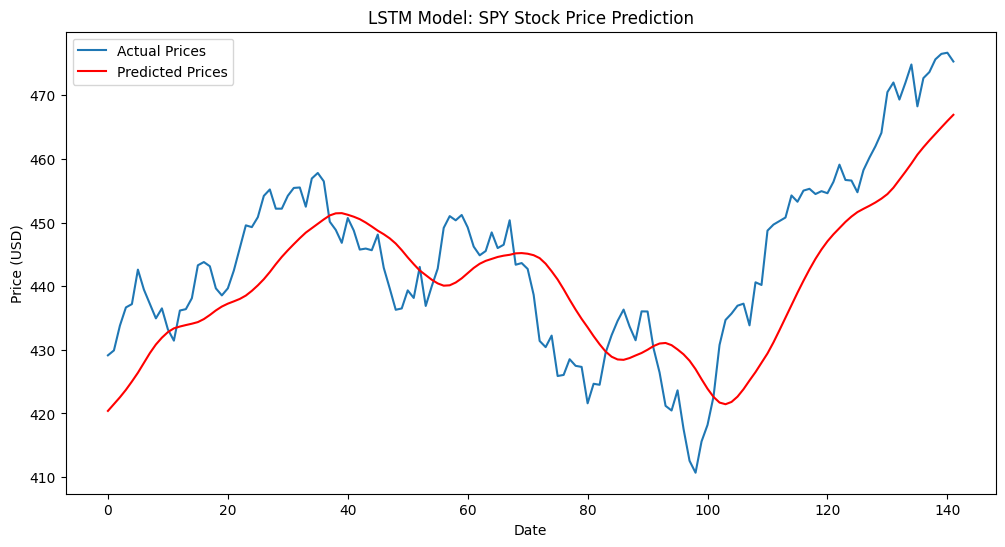


TSLA - MAE: 12.082709946462368, RMSE: 15.22159725561798, MAPE: 4.988728611557927%

BND - MAE: 0.6090590247625991, RMSE: 0.7446643702936527, MAPE: 0.8555202590509179%

SPY - MAE: 8.075361227219961, RMSE: 9.297931421223565, MAPE: 1.8155389255071037%


In [41]:
tickers = ['TSLA', 'BND', 'SPY']
raw_data_path = 'raw/'
processed_data_path = 'processed/'
models_folder_path = '../Models/'
os.makedirs(processed_data_path, exist_ok=True)

models = {}
metrics = {}
seq_length = 60

for ticker in tickers:
    print(f"\nProcessing data for {ticker}...")

    file_path = os.path.join(raw_data_path, f'{ticker}.csv')
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    close_prices = data['Close'].values.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices)

    train_size = int(len(scaled_data) * 0.8)
    train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

    def create_sequences(data, seq_length=60):
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

    models[ticker] = model
    metrics[ticker] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    # Save the model in the Models folder
    model.save(os.path.join(models_folder_path, f"{ticker}_lstm_model.h5"))

    print(f"\nEvaluation Metrics for {ticker}:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape}%")

    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices')
    plt.plot(predicted_prices, label='Predicted Prices', color='red')
    plt.title(f'LSTM Model: {ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Summary of metrics
for ticker, metric in metrics.items():
    print(f"\n{ticker} - MAE: {metric['MAE']}, RMSE: {metric['RMSE']}, MAPE: {metric['MAPE']}%")